In [1]:
import pandas as pd

df = pd.read_csv('../data/train_FD001_cleaned.csv')
df.head()


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_6,sensor_measurement_7,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,21.61,554.36,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,21.61,553.75,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,21.61,554.26,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,21.61,554.45,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,21.61,554.00,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [2]:
from sklearn.preprocessing import MinMaxScaler

feature_cols = [col for col in df.columns if 'sensor' in col]

scaler = MinMaxScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])


In [3]:
from sklearn.model_selection import train_test_split

X = df[feature_cols]
y = df['RUL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 34.04
Root Mean Squared Error (RMSE): 44.32


In [6]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [7]:
y_rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_rf_pred))

print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")


Random Forest MAE: 29.56
Random Forest RMSE: 41.38


In [8]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.1/150.0 MB 15.4 MB/s eta 0:00:10
   - -------------------------------------- 4.2/150.0 MB 11.5 MB/s eta 0:00:13
   - -------------------------------------- 5.8/150.0 MB 9.8 MB/s eta 0:00:15
   - -------------------------------------- 7.1/150.0 MB 8.1 MB/s eta 0:00:18
   -- ------------------------------------- 8.1/150.0 MB 7.5 MB/s eta 0:00:19
   -- ------------------------------------- 9.2/150.0 MB 7.0 MB/s eta 0:00:21
   -- ------------------------------------- 9.7/150.0 MB 6.5 MB/s eta 0:00:22
   -- ------------------------------------- 10.0/150.0 MB 6.1 MB/s eta 0:00:23
   -- ------------------------------------- 10.2/150.0 MB 5.5 MB/s eta 0:00:26
   -- ------------------------------------- 10.5/150.0 MB 5.1 MB/s eta 0:00:28
   -- ------------------------------------- 10.7/150.0 MB 4.8 MB/s eta 0:

In [9]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_xgb_pred = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, y_xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_xgb_pred))

print(f"XGBoost MAE: {xgb_mae:.2f}")
print(f"XGBoost RMSE: {xgb_rmse:.2f}")


XGBoost MAE: 29.65
XGBoost RMSE: 41.50


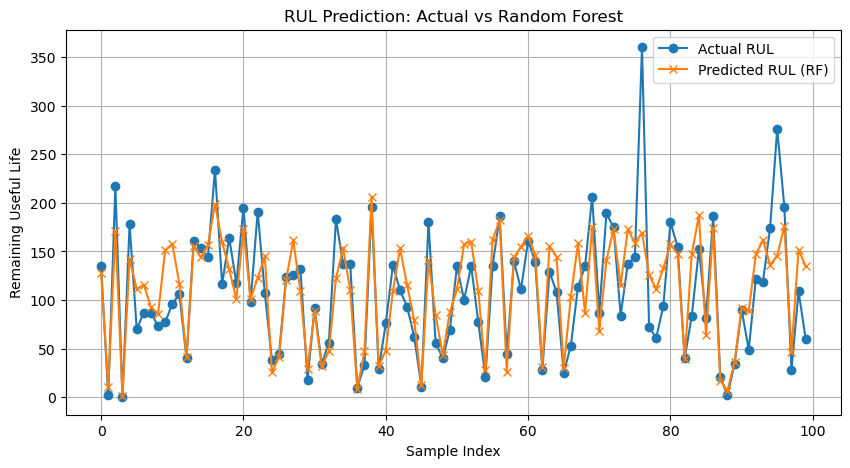

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual RUL', marker='o')
plt.plot(y_rf_pred[:100], label='Predicted RUL (RF)', marker='x')
plt.title('RUL Prediction: Actual vs Random Forest')
plt.xlabel('Sample Index')
plt.ylabel('Remaining Useful Life')
plt.legend()
plt.grid(True)
plt.show()
